# Lesson 1 Assignment - EnergyLoads
## Author - Studentname

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set there some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [83]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [84]:
# Cleaned up Dataset location
# fileName = 'C:\\Users\\mayur_000\\Anaconda3\\Scripts\\DataAnalysis\\AditiProject\\ClassData1.csv'
fileName = 'C://Users//mayur_000//Anaconda3//Scripts//DataAnalysis//AditiProject//AditiData.csv'
#url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv'
#classData = pd.read_csv(fileName)
classData = pd.read_csv(fileName,encoding='windows-1252',index_col=None, na_values=["?"])


In [73]:
classData.dtypes

Roll No              int64
Last Name           object
First Name          object
Height in          float64
Sept                 int64
Oct                  int64
Nov                  int64
Dec                  int64
Jan                  int64
Feb                  int64
Mar                  int64
Apr                float64
City                object
Total Absenties      int64
dtype: object

In [85]:
classData.head(35)


,Roll No,Last Name,First Name,Height in,Sept,Oct,Nov,Dec,Jan,Feb,Mar,Apr,City,Total Absenties
0,25,RAJASEKARAN,AJAY,65.0,0,0,0,0,0,0,0,0.0,Kirkland,0
1,2,AMSBRY,TALULLA,66.0,0,1,0,0,1,0,0,1.0,Redmond,2
2,19,LING,SOPHIA,61.5,0,1,1,0,0,0,0,1.0,Redmond,2
3,23,NAM,HANARA,62.0,0,0,1,0,0,0,1,1.0,Kirkland,2
4,29,SHUKLA,PRAKRITI,62.0,0,0,0,0,0,0,3,1.0,Redmond,3
5,12,GUPTA,KASHISH,63.0,0,0,0,0,0,1,2,0.0,Sammamish,3
6,15,JOSHI,ADITI,63.0,0,0,1,0,0,2,0,0.0,Redmond,3
7,22,MESSINA,MADISON,63.0,0,1,0,4,0,0,0,0.0,Redmond,4
8,4,BINU,CHRISTINE,64.0,0,0,1,0,1,0,1,1.0,Redmond,3
9,21,MAGESH,DAKSHA,64.0,0,0,0,2,2,4,1,0.0,Redmond,9


In [74]:
classData['City'].unique()

array(['Kirkland', 'Redmond', 'Sammamish'], dtype=object)

In [ ]:
classData['City']

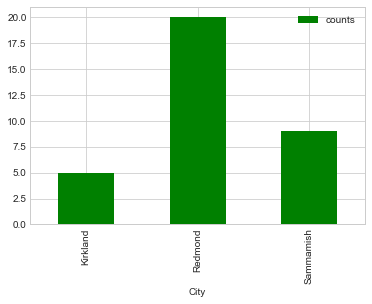

In [81]:
%matplotlib inline
#auto_price['counts'] = 1
#auto_price[['counts', 'make']].groupby(['make']).agg('count')
classData['counts'] = 1
classData[['counts','City']].groupby(['City']).agg('count').plot.bar(color='green')

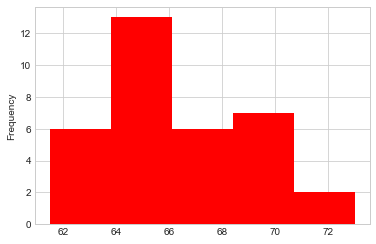

In [82]:
classData.loc[:,'Height in'].plot.hist(bins = 5,color='red')

{'boxes': [<matplotlib.lines.Line2D at 0x1ae0fd28ba8>],
 'caps': [<matplotlib.lines.Line2D at 0x1ae0fca60b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae0fdebf28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ae0fdebda0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1ae0fd28c50>,
  <matplotlib.lines.Line2D at 0x1ae0fd284e0>]}

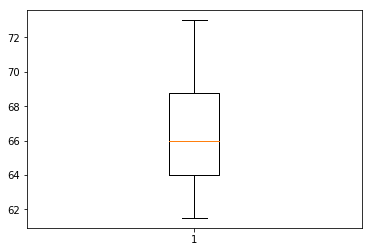

In [77]:
import matplotlib.pyplot as plt
plt.boxplot(classData.loc[:,'Height in'])

Text(0,0.5,'Density')

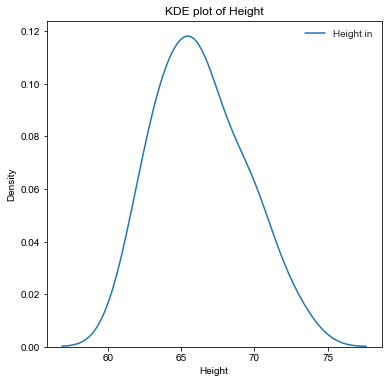

In [79]:
import seaborn as sns
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(classData.loc[:, 'Height in'], ax = ax)
ax.set_title('KDE plot of Height') # Give the plot a main title
ax.set_xlabel('Height') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

Text(0,0.5,'Height in')

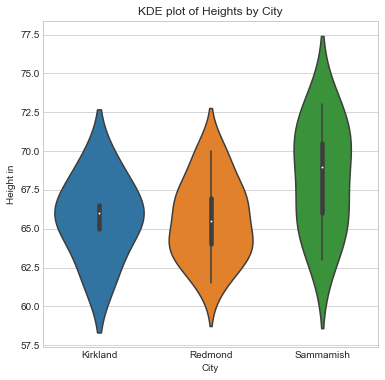

In [106]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'City', y = 'Height in', data = classData, ax = ax)
ax.set_title('KDE plot of Heights by City') # Give the plot a main title
ax.set_xlabel('City') # Set text for the x axis
ax.set_ylabel('Height in')# Set text for y axis

Text(0,0.5,'Total Absenties')

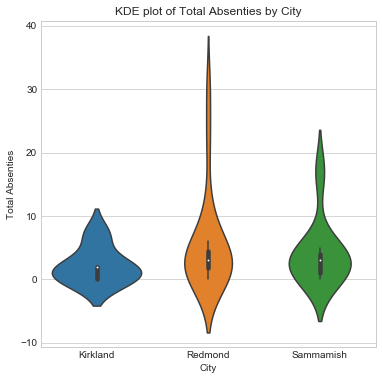

In [102]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'City', y = 'Total Absenties', data = classData, ax = ax)
ax.set_title('KDE plot of Total Absenties by City') # Give the plot a main title
ax.set_xlabel('City') # Set text for the x axis
ax.set_ylabel('Total Absenties')# Set text for y axis

C:\Users\mayur_000\Anaconda3\lib\site-packages\pandas\core\frame.py:5847: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)
C:\Users\mayur_000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE11EEFA90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001AE11F35E80>], dtype=object)

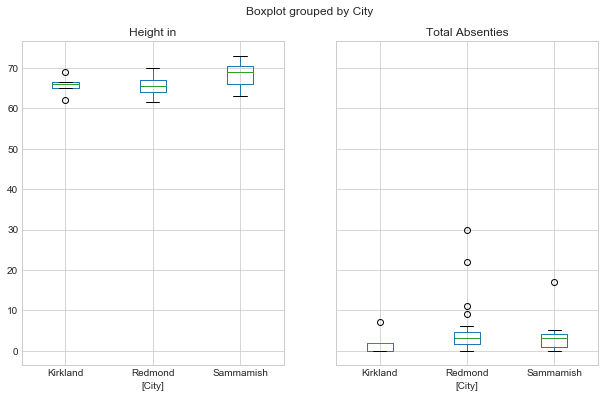

In [94]:
import seaborn as sns
fig = plt.figure(figsize=(10, 6)) # define plot area
ax = fig.gca() # define axis 
classData.loc[:,['Height in','Total Absenties','City']].boxplot(by = ['City'], ax = ax)


In [104]:
import folium
m = folium.Map(
    location=[47.6062, -122.3321], # center of map
    
    zoom_start=12, # initial zoom level max is 18, min is 1 
    tiles='Stamen Terrain' # tile style
)
m